# Lab 7

**Due Date**: 3/28/25 by 8pm on Canvas

## Installing Libraries

Machine learning in Python has a plethora of popularly used libraries. We can install these library packages within the Jupyter Notebooks itself. Just run the cell below and it should download and install them to your computer. You only need to run this cell one time. After the package has been installed, feel free to change the cell type below from "Code" to "Raw" so it doesn't run this again.

Here's a breakdown of what each library will be used for:

- [Matplotlib](https://matplotlib.org/) for data visualization
- [NumPy](https://numpy.org/) for numerical processing of large, multi-dimensional arrays and matrices
- [pandas](https://pandas.pydata.org/) for fast and easy data analysis and manipulation
- [scikit-learn](https://scikit-learn.org/stable/index.html) which contains many out-of-the-box classification, regression and clustering algorithms for ML
- [Seaborn](https://seaborn.pydata.org/#) for further data visualization through a high-level interface for drawing attractive and informative statistical graphics
- [statsmodels](https://www.statsmodels.org/stable/index.html) for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration

In [1]:
import sys
!{'"' + sys.executable + '"'} -m pip install matplotlib
!{'"' + sys.executable + '"'} -m pip install numpy
!{'"' + sys.executable + '"'} -m pip install pandas
!{'"' + sys.executable + '"'} -m pip install scikit-learn
!{'"' + sys.executable + '"'} -m pip install seaborn
!{'"' + sys.executable + '"'} -m pip install statsmodels

<class 'OSError'>: Not available

In [2]:
%pip install matplotlib
%pip install numpy
%pip install pandas
%pip install scikit-learn
%pip install seaborn
%pip install statsmodels

## Imports

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


## Logistic Regression

Let's start with the logistic regression algorithm. The first thing we should explore is the logistic/sigmoid/expit function. Let's see how this looks as a graph.

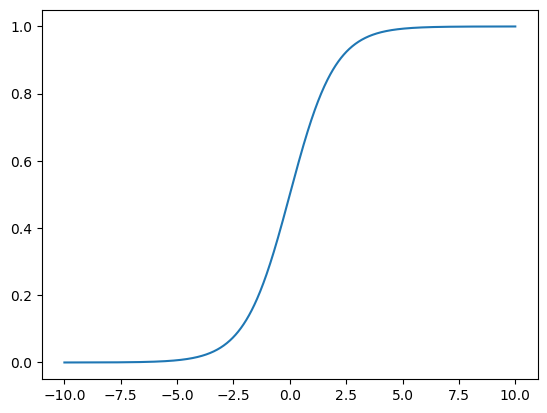

In [4]:
def logistic(x, weight, bias):
    p = 1.0 / (1.0 + np.exp(-(weight * x + bias)))
    return p

logistic_x = np.linspace(-10, 10, 1000)
logistic_y = logistic(logistic_x, 1, 0)

plt.plot(logistic_x, logistic_y)
plt.show()

Now, let's read in some data. You will need to create a simple CSV file to act as our dataset. If you're not familiar, CSV stands for **comma-separated values**. It is a popular file format for sharing data in a platform-independent way. You can use [this website](https://tableconvert.com/csv-generator) to easily generate a CSV file. Make sure this file only has two columns ("x" and "y"). This should be the first row in the CSV file. In the "x" column, you can use any numerical value you want. For the "y" column (i.e., our label), use either 0 or 1.

Once you have created your data, make sure to save it as a CSV file and have it placed in the same folder as this notebook. With that done, you just need to adjust the filname in the code below.

In [5]:
dataset = pd.read_csv('logistic-file1.csv', delimiter=',')
X = dataset.values[:, :-1]
Y = dataset.values[:, -1]

Next, let's create a logistic regression classifier and use our data to train it. We will then plot the results. However, to do this, you need to separate the x-values from the dataset based on their label. Create two lists (`X_neg` and `X_pos`) that will store these different values. Use a loop on `dataset.values` to populate the two lists.

I also encourage you to try out and experiment with different parameter adjustments to the [`LogisticRegression()` function](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Some fun ones to try out: `penalty`, `C`, and `solver`.

Weight vector: [-9.12571624e-01 -3.76297772e-01 -8.30901537e-06  3.76175272e-01
  9.12702433e-01]
Bias: [ 3.71187221  2.34342135  0.77738719 -1.41814336 -5.41453739]


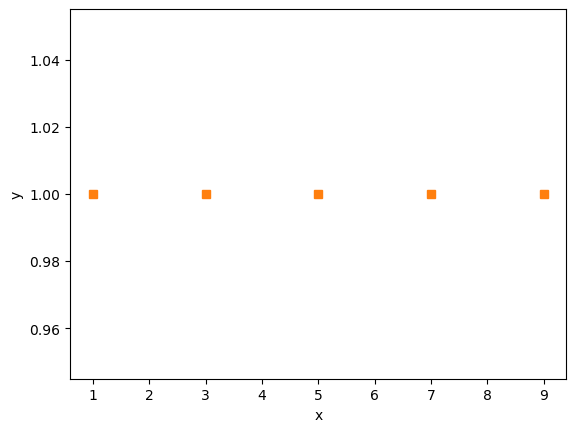

In [6]:
classifer = LogisticRegression()
model = classifer.fit(X, Y)

print('Weight vector:', model.coef_.flatten())
print('Bias:', model.intercept_.flatten())

# TODO: create two lists (`X_pos` and `X_neg`)
X_pos = []
X_neg = []

for x, y in dataset.values:
    if y == 0:
        X_neg.append(x)
    else:
        X_pos.append(x)

X_neg = np.array(X_neg)
X_pos = np.array(X_pos)

Y_neg = np.linspace(0, 0, len(X_neg))
Y_pos = np.linspace(1, 1, len(X_pos))

plt.plot(X_neg, Y_neg, 'o')
plt.plot(X_pos, Y_pos, 's')
plt.xlabel(dataset.columns[0])
plt.ylabel(dataset.columns[1])
plt.show()

With our logistic regression model trained, let's graph how the probability curve looks.

In [7]:
%pip install seaborn

In [8]:
import seaborn as sns
print("Seaborn is installed successfully!")

Seaborn is installed successfully!


In [9]:
%pip install statsmodels

In [10]:
import statsmodels.api as sm
print("statsmodels is installed successfully!")

statsmodels is installed successfully!


<Axes: >

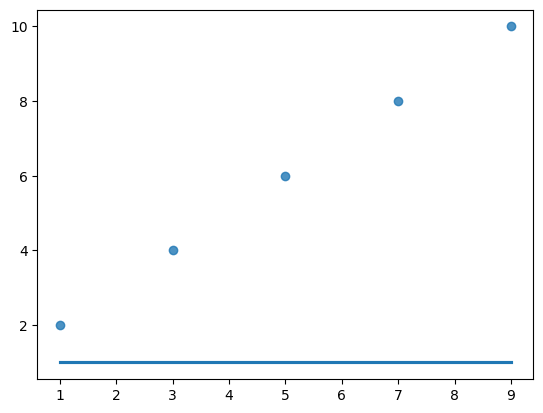

In [11]:
sns.regplot(x=X, y=Y, data=dataset, logistic=True, ci=None)

Finally, let's test new data points. Write code that grabs numerical input from the user. You need to store this value in a 2D list.

In [18]:
# TODO: get the input and call it `test_x`
test_x = [[float(input("Enter a numerical value for prediction: "))]]

test_y = model.predict(test_x)
print('Logistic regression predicts label:', int(test_y[0]))
print('Probabilities for each label:', model.predict_proba(test_x).flatten())

<class 'TypeError'>: float() argument must be a string or a real number, not 'PyodideFuture'

Enter a numerical value for prediction:  8


## Linear Regression

Next, let's try out the linear regression algorithm. You will need to create a different CSV file with data to use. As before, keep this to two columns ("x" and "y"). Remember that key difference in linear regression (as opposed to logistic regression) is that our labels are continuous values (so, don't stick to just 0 and 1).

Again, once your dataset is ready, download the CSV file, make sure it's in the same location as this notebook, and then change the code below to match your filename.

In [19]:
dataset = pd.read_csv('linear-file.csv', delimiter=',')
X = dataset.values[:, :-1]
Y = dataset.values[:, -1]

Next, let's use our data to create a linear regression model. We will then plot the results.

Weight vector: [1.]
Bias: [1.]


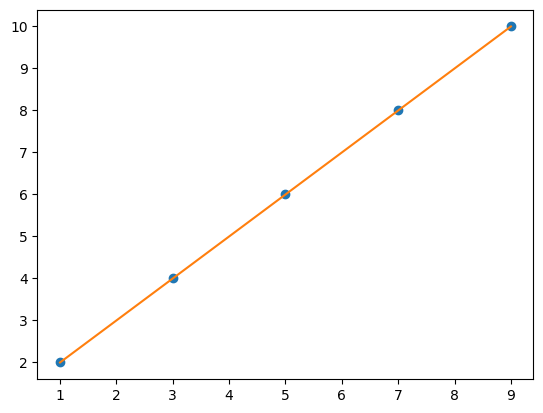

In [14]:
reg = LinearRegression()
model = reg.fit(X, Y)
weight = model.coef_.flatten()
bias = model.intercept_.flatten()

print('Weight vector:', weight)
print('Bias:', bias)

plt.plot(X, Y, 'o')
plt.plot(X, weight * X + bias)
plt.show()

From the lecture, we talked about OLS (ordinary least squares). Let's calculate this ourselves. For the points in the dataset, calculate and display the sum of squares ($S$) and the mean squared error ($\text{MSE}$):

$$
\begin{align*}
S &= \sum_{i=1}^{n} (\hat{y}_i - y_i)^2 \\
\hat{y}_i &= \mathbf{w}^{\mathrm{T}}\mathbf{x}_i + b \\
\text{MSE} &= \frac{S}{n} \\
\end{align*}
$$

Do this by looping through `points`. Inside of `points`, there is a single point, which contains an `x` and `y`. You can access this with the `.` operator. For example:

```Python
p = points[0]
print(p.x, p.y)
```

In [24]:
points = dataset.itertuples()
sum_of_squares = 0.0
MSE = 0.0
n = len(dataset)

# TODO: calculate the sum of squares and MSE
for point in points:
    actual_label = point[1]
    predicted_label = model.predict([[point[0]]])[0]
    squared_err = (actual_label - predicted_label)**2

    sum_of_squares = squared_err + squared_err
MSE = sum_of_squares/n

print('Sum of squares =', sum_of_squares)
print('MSE (mean squared error) =', MSE)

Sum of squares = 32.0
MSE (mean squared error) = 6.4


Finally, let's test new data points. Use the same code you wrote earlier to grab input from the user and store this in a 2D list.

In [25]:
# TODO: get the input and call it `test_x`
test_x = [[float(input("Enter a numerical value for prediction: "))]]

test_y = model.predict(test_x)
print('Linear regression predicts label:', test_y[0])

<class 'TypeError'>: float() argument must be a string or a real number, not 'PyodideFuture'

Enter a numerical value for prediction:  8


## Comparing OLS and Ridge Regression

Lastly, we need to compare and contrast OLS and ridge regression. Remember from lecture that OLS is doing MLE to find the weights, while ridge regression is using a MAP approach. The code below will generate a random dataset and visualize the results. What's missing is the actual training portion. Write code that will create an OLS model and a ridge model. For both of these models, calculate the MSE values by using the `mean_squared_error` from scikit-learn.

For ridge regression specifically, I encourage you to play around with the `alpha` parameter. This term is the $\lambda$ that was mentioned in the lecture (i.e, $\lambda = \frac{\sigma^2}{n\tau^2}$) that deals with regularization.

OLS Mean Squared Error: 0.1998
Ridge Mean Squared Error: 0.2009

 [2.20612176] ts:
 0.9650094615834883
Ridge Coefficients: [2.06400114] 
 1.0123659234313651


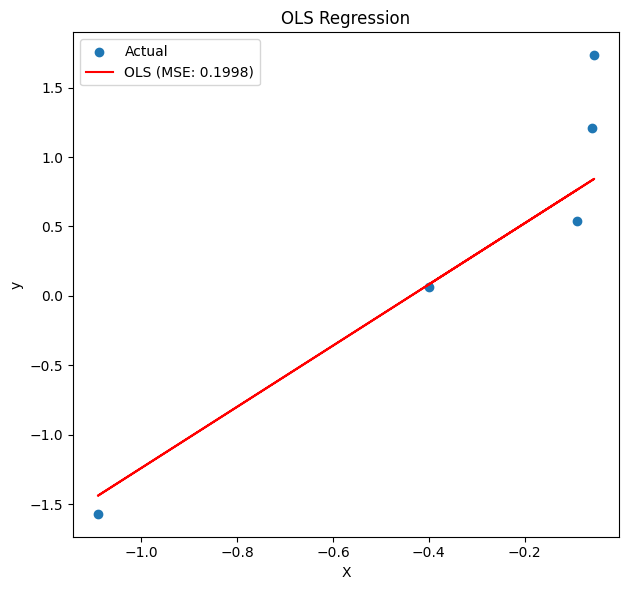

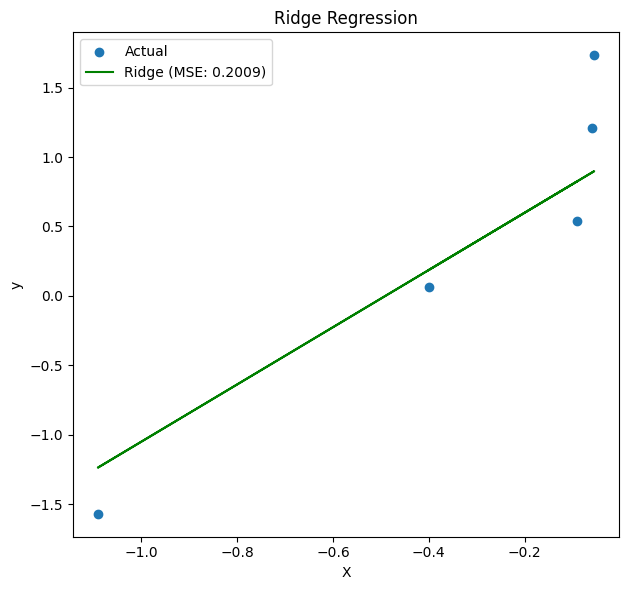

In [26]:
# generate some 2D synthetic data
n_samples = 25 # <-- change this if you want
X = np.random.randn(n_samples, 1)
y = 2 * X.squeeze() + 1 + np.random.randn(n_samples) * 0.5

# split the data into training and "testing" sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# TODO: create OLS model (store it as `ols`), train it, make predictions (store it as `y_pred_ols`), and compute MSE (store it as `mse_ols`)
ols = LinearRegression()
ols.fit(X_train, y_train)
y_pred_ols = ols.predict(X_test)
mse_ols = mean_squared_error(y_test, y_pred_ols)

# TODO: create ridge model (store it as `ridge`), train it, make predictions (store it as `y_pred_ridge`), and compute MSE (store it as `mse_ridge`)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# print the results
print(f'OLS Mean Squared Error: {mse_ols:.4f}')
print(f'Ridge Mean Squared Error: {mse_ridge:.4f}')

# compare coefficients
print('\nOLS Coefficients:', ols.coef_, '\nIntercept (Bias):', ols.intercept_)
print('Ridge Coefficients:', ridge.coef_, '\nIntercept (Bias):', ridge.intercept_)

# visualization
def visualize_plot(X_test, y_test, y_pred, color, label, mse, title):
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.scatter(X_test, y_test, label='Actual')
    plt.plot(X_test, y_pred, color=color, label=f'{label} (MSE: {mse:.4f})')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(title)
    plt.legend()
    
    plt.tight_layout()
    plt.show()

visualize_plot(X_test, y_test, y_pred_ols, 'red', 'OLS', mse_ols, 'OLS Regression')
visualize_plot(X_test, y_test, y_pred_ridge, 'green', 'Ridge', mse_ridge, 'Ridge Regression')